In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [2]:
import pandas as pd
from graphviz import Digraph
from sklearn.tree import export_graphviz
from graphviz import Source
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer, make_moons
from ml_lib import DecisionTreeClassifier as CustomDTC
from utils.helpers import plot_decision_boundary

CustomDTC Accuracy 0.9833333333333333
SklearnDTC Accuracy 0.9833333333333333


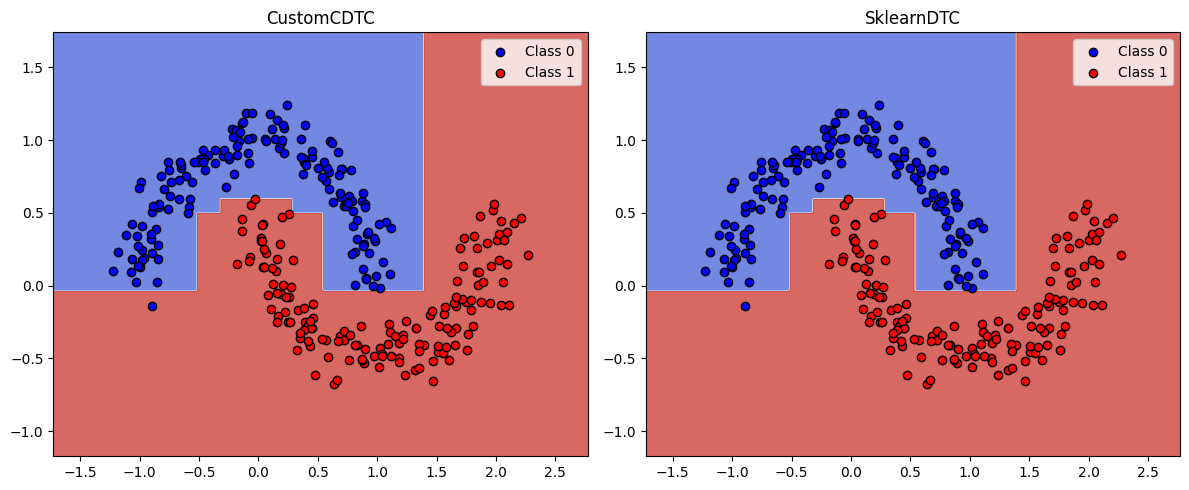

In [3]:
X, y = make_moons(n_samples=300, noise=0.1,random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cdtc = CustomDTC()
dtc = DecisionTreeClassifier(random_state=42)

cdtc.fit(X_train, y_train)
dtc.fit(X_train, y_train)

y_pred_cdtc = cdtc.predict(X_test)
y_pred_dtc = dtc.predict(X_test)

print("CustomDTC Accuracy", accuracy_score(y_test, y_pred_cdtc))
print("SklearnDTC Accuracy", accuracy_score(y_test, y_pred_dtc))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

plot_decision_boundary(cdtc, X, y, ax1, "CustomCDTC")
plot_decision_boundary(dtc, X, y, ax2, "SklearnDTC")

plt.tight_layout()

In [4]:
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cdtc.set_params(max_depth=4)
dtc.set_params(max_depth=4)

cdtc.fit(X_train, y_train)
dtc.fit(X_train, y_train)

y_pred_cdtc = cdtc.predict(X_test)
y_pred_dtc = dtc.predict(X_test)

print("CustomDTC Accuracy:", accuracy_score(y_test, y_pred_cdtc))
print("SklearnDTC Accuracy:", accuracy_score(y_test, y_pred_dtc))

CustomDTC Accuracy: 0.9385964912280702
SklearnDTC Accuracy: 0.9473684210526315


In [9]:
def visualize_tree(node, dot=None, counter=None, parent_id=None, edge_label=""):
    if dot is None:
        dot = Digraph()
    if counter is None:
        counter = [0]  # Mutable counter to track unique node IDs
    
    node_id = counter[0]
    counter[0] += 1
    
    if node._is_leaf():
        label = f"Predict: {node._label}\nGini: {node._impurity:.3f}\nSamples: {node._samples}\nValues: {node._values}"
    else:
        label = f"[X{node._feature_idx} ≤ {node._threshold:.2f}]\nGini: {node._impurity:.3f}\nSamples: {node._samples}\nValues: {node._values}"
    
    dot.node(str(node_id), label)
    
    if parent_id is not None:
        dot.edge(str(parent_id), str(node_id), label=edge_label)
    
    if not node._is_leaf():
        visualize_tree(node._left_node, dot, counter, node_id, edge_label="True")
        visualize_tree(node._right_node, dot, counter, node_id, edge_label="False")
    
    return dot

dot1 = Digraph()

dot2 = export_graphviz(
    dtc,
    out_file=None, 
    filled=True,
    rounded=True,
    special_characters=True
)

graph = Source(dot2)



In [10]:
visualize_tree(cdtc.get_params()["root"], dot1)

dot1.render("graphs/CustomDTC", format="png",)
graph.render("graphs/SklearnDTC", format="png", cleanup=False)

'graphs\\SklearnDTC.png'